In [1]:
#Het lineare model:

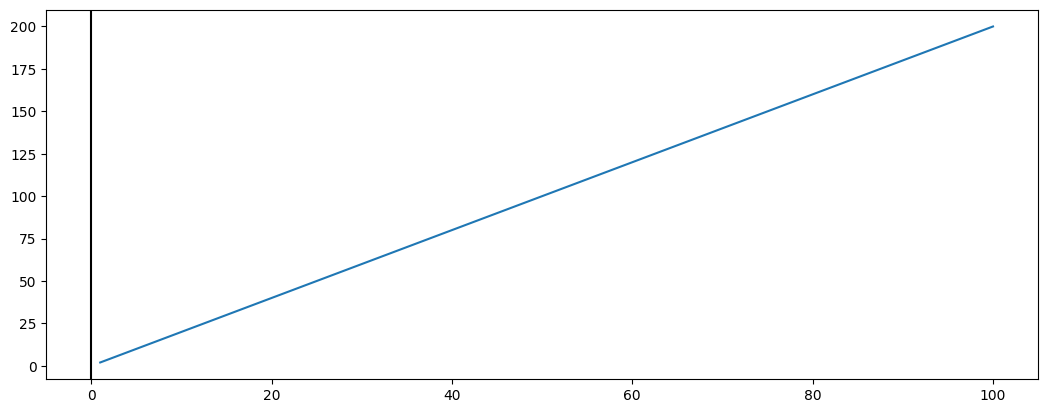

[2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32, 34, 36, 38, 40, 42, 44, 46, 48, 50, 52, 54, 56, 58, 60, 62, 64, 66, 68, 70, 72, 74, 76, 78, 80, 82, 84, 86, 88, 90, 92, 94, 96, 98, 100, 102, 104, 106, 108, 110, 112, 114, 116, 118, 120, 122, 124, 126, 128, 130, 132, 134, 136, 138, 140, 142, 144, 146, 148, 150, 152, 154, 156, 158, 160, 162, 164, 166, 168, 170, 172, 174, 176, 178, 180, 182, 184, 186, 188, 190, 192, 194, 196, 198, 200]


In [2]:

from ODE_modellen import tumorODE

testTumor = tumorODE(0,100, 1)

Ts,Vs = testTumor.linear_model(2)

tumorODE.plot(Ts,Vs)
print(Vs)


In [3]:
#exp. model:

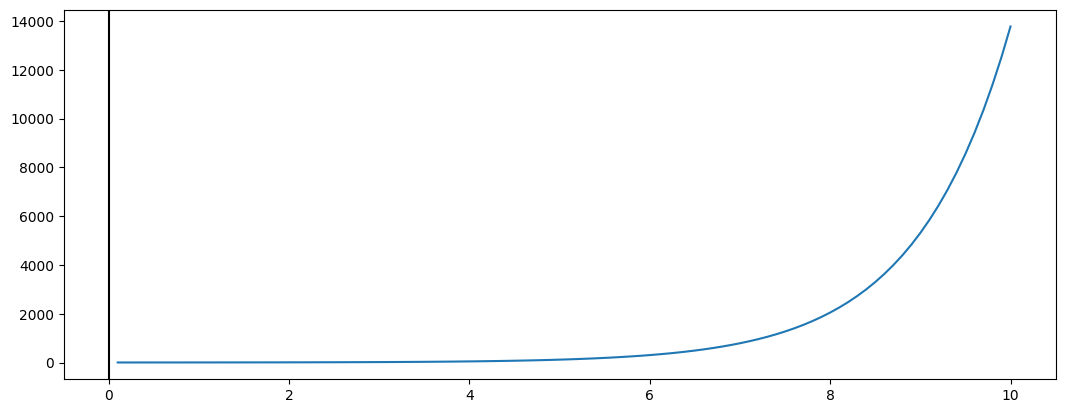

In [28]:
from ODE_modellen import tumorODE


testTumor = tumorODE(1,100, 0.1)

Ts,Vs = testTumor.exponentieel_model(1)

tumorODE.plot(Ts,Vs)



In [5]:
# Mendelsohn groei: 

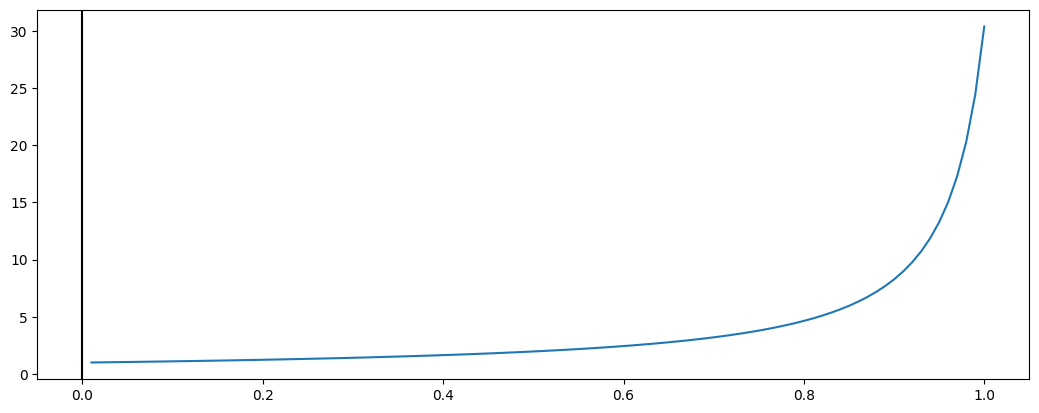

In [24]:
from ODE_modellen import tumorODE

testTumor = tumorODE(1,100, 0.01)

Ts,Vs = testTumor.mendelsohn_model(1,2)

tumorODE.plot(Ts,Vs)


In [ ]:
# linear gelimiteerde groei:

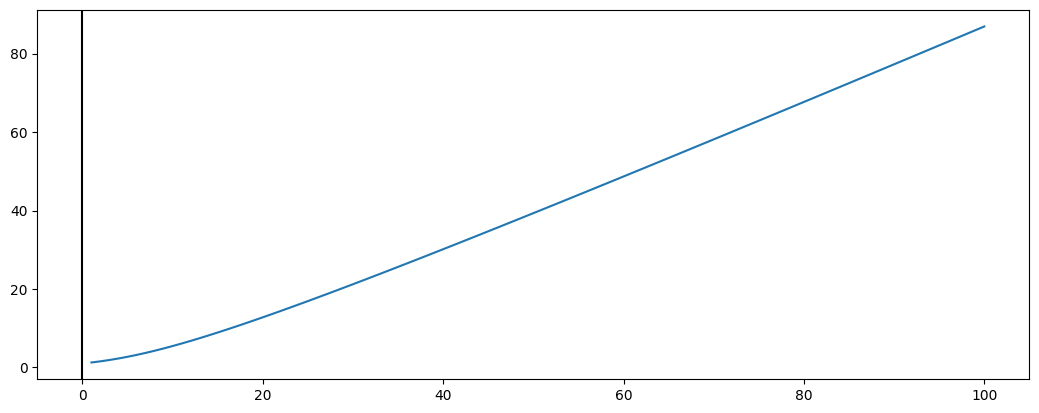

In [17]:
from ODE_modellen import tumorODE


testTumor = tumorODE(1,100, 1)

Ts,Vs = testTumor.linear_gelimiteerdegroei_model(1,3)

tumorODE.plot(Ts,Vs)

In [ ]:
# Oppervlak gelimiteerde groei:

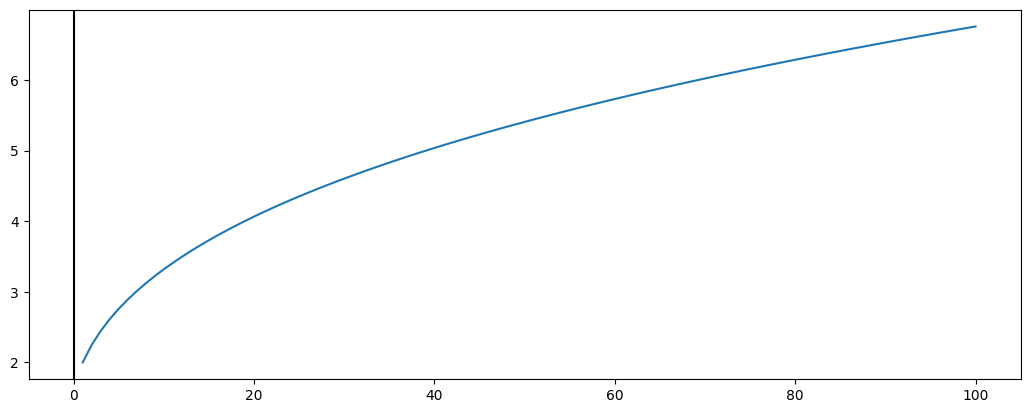

In [16]:
from ODE_modellen import tumorODE


testTumor = tumorODE(1,100, 1)

Ts,Vs = testTumor.oppervlak_gelimiteerdegroei_model(1,3)

tumorODE.plot(Ts,Vs)

In [ ]:
# exponentieel afvlakkendegroei model:

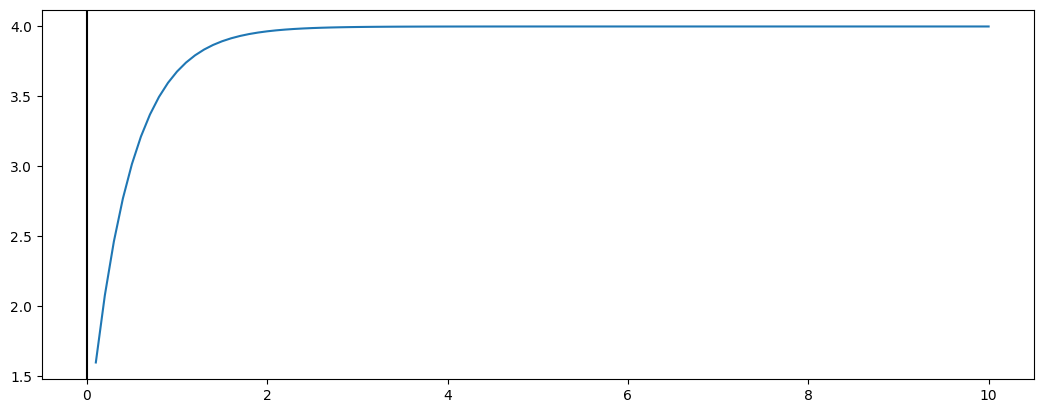

In [15]:
from ODE_modellen import tumorODE

# Met een tijdsstapgrootte van 1 oscilleert het heel erg.
testTumor = tumorODE(1,100, 0.1)

Ts,Vs = testTumor.exponentieel_afvlakkendegroei_model(2,4)

tumorODE.plot(Ts,Vs)

In [ ]:
# von_bertalanffy_model

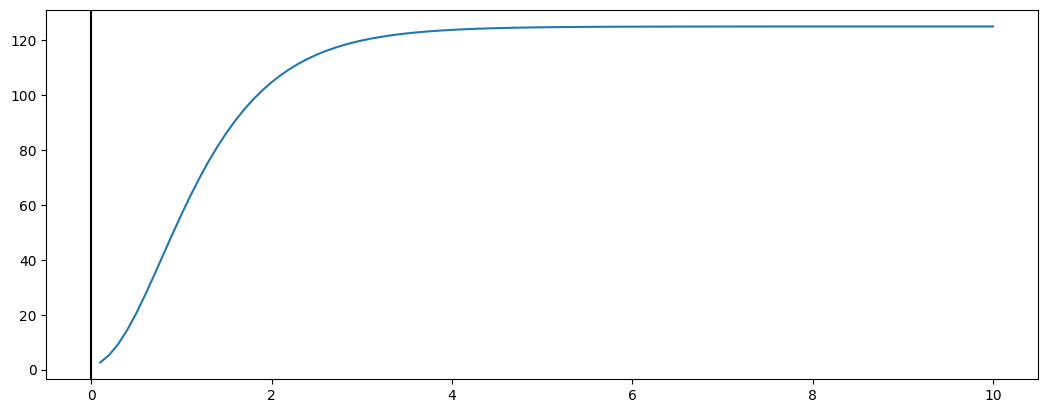

In [14]:
from ODE_modellen import tumorODE

# Werkt niet met tijdsstap van 1...
testTumor = tumorODE(1,100, 0.1)

Ts,Vs = testTumor.von_bertalanffy_model(2,4)

tumorODE.plot(Ts,Vs)

In [ ]:
# allee_effect_groei

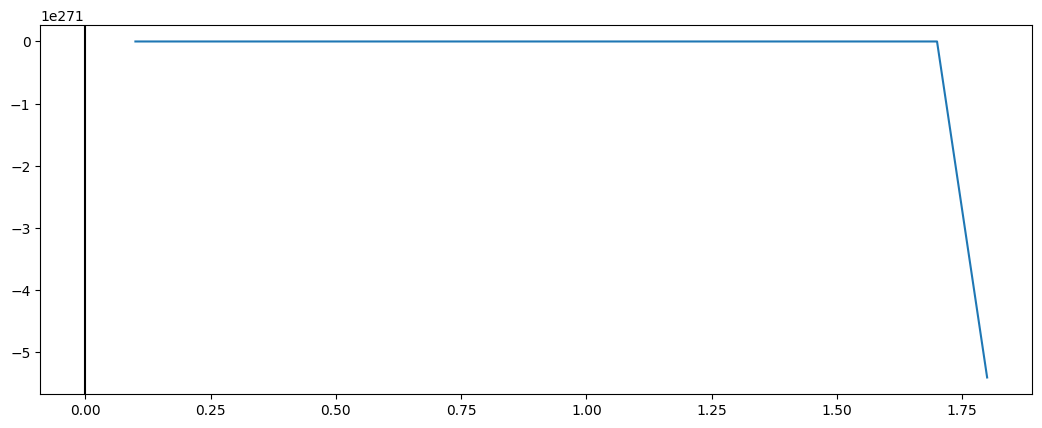

In [13]:
from ODE_modellen import tumorODE


testTumor = tumorODE(1,1000, 0.1)

Ts,Vs = testTumor.allee_effect_groei(1,2,3)

tumorODE.plot(Ts,Vs)

In [ ]:
# gompertz_groei: